In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

filename = "Donnees_projet_fil_rouge.csv"
df = pd.read_csv(filename, header=0, sep=';')  # essayez d'abord avec point-virgule

print(f"Dataset Shape: {df.shape}")

print(df.columns)

Dataset Shape: (2756, 21)
Index(['Classe', 'Nom', 'MS % brut', 'PB % brut', 'CB % brut', 'MGR % brut',
       'MM % brut', 'NDF % brut', 'ADF % brut', 'Lignine % brut',
       'Amidon % brut', 'Sucres % brut', 'EB (kcal) kcal/kg brut',
       'ED porc croissance (kcal) kcal/kg brut',
       'EM porc croissance (kcal) kcal/kg brut',
       'EN porc croissance (kcal) kcal/kg brut',
       'EMAn coq (kcal) kcal/kg brut', 'EMAn poulet (kcal) kcal/kg brut',
       'UFL 2018 par kg brut', 'PDI 2018 g/kg brut',
       'BalProRu 2018 g/kg brut'],
      dtype='object')


In [3]:
print(df.head())

     Classe  Nom  MS % brut  PB % brut  CB % brut  MGR % brut  MM % brut  \
0  Céréales  Blé  90.800003        8.0        2.0         1.2        1.3   
1  Céréales  Blé  90.000000        8.0        1.9         1.2        1.4   
2  Céréales  Blé  89.000000        8.0        1.9         1.2        1.4   
3  Céréales  Blé  88.800003        8.0        1.9         1.2        1.4   
4  Céréales  Blé  88.500000        8.0        2.3         1.2        1.6   

   NDF % brut  ADF % brut  Lignine % brut  ...  Sucres % brut  \
0        11.4         2.8             0.9  ...            2.6   
1        11.0         2.7             0.9  ...            2.6   
2        10.9         2.7             0.9  ...            2.6   
3        10.9         2.7             0.9  ...            2.6   
4        12.5         3.2             1.0  ...            2.6   

   EB (kcal) kcal/kg brut  ED porc croissance (kcal) kcal/kg brut  \
0                    3900                                    3470   
1             

/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/3394276808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2', ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/3394276808.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set2', ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/3394276808.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, kde=True, palette='Set2', bins=30, ax=ax)
/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/3394276808.py:29: UserWarning: Ignoring `palette` b

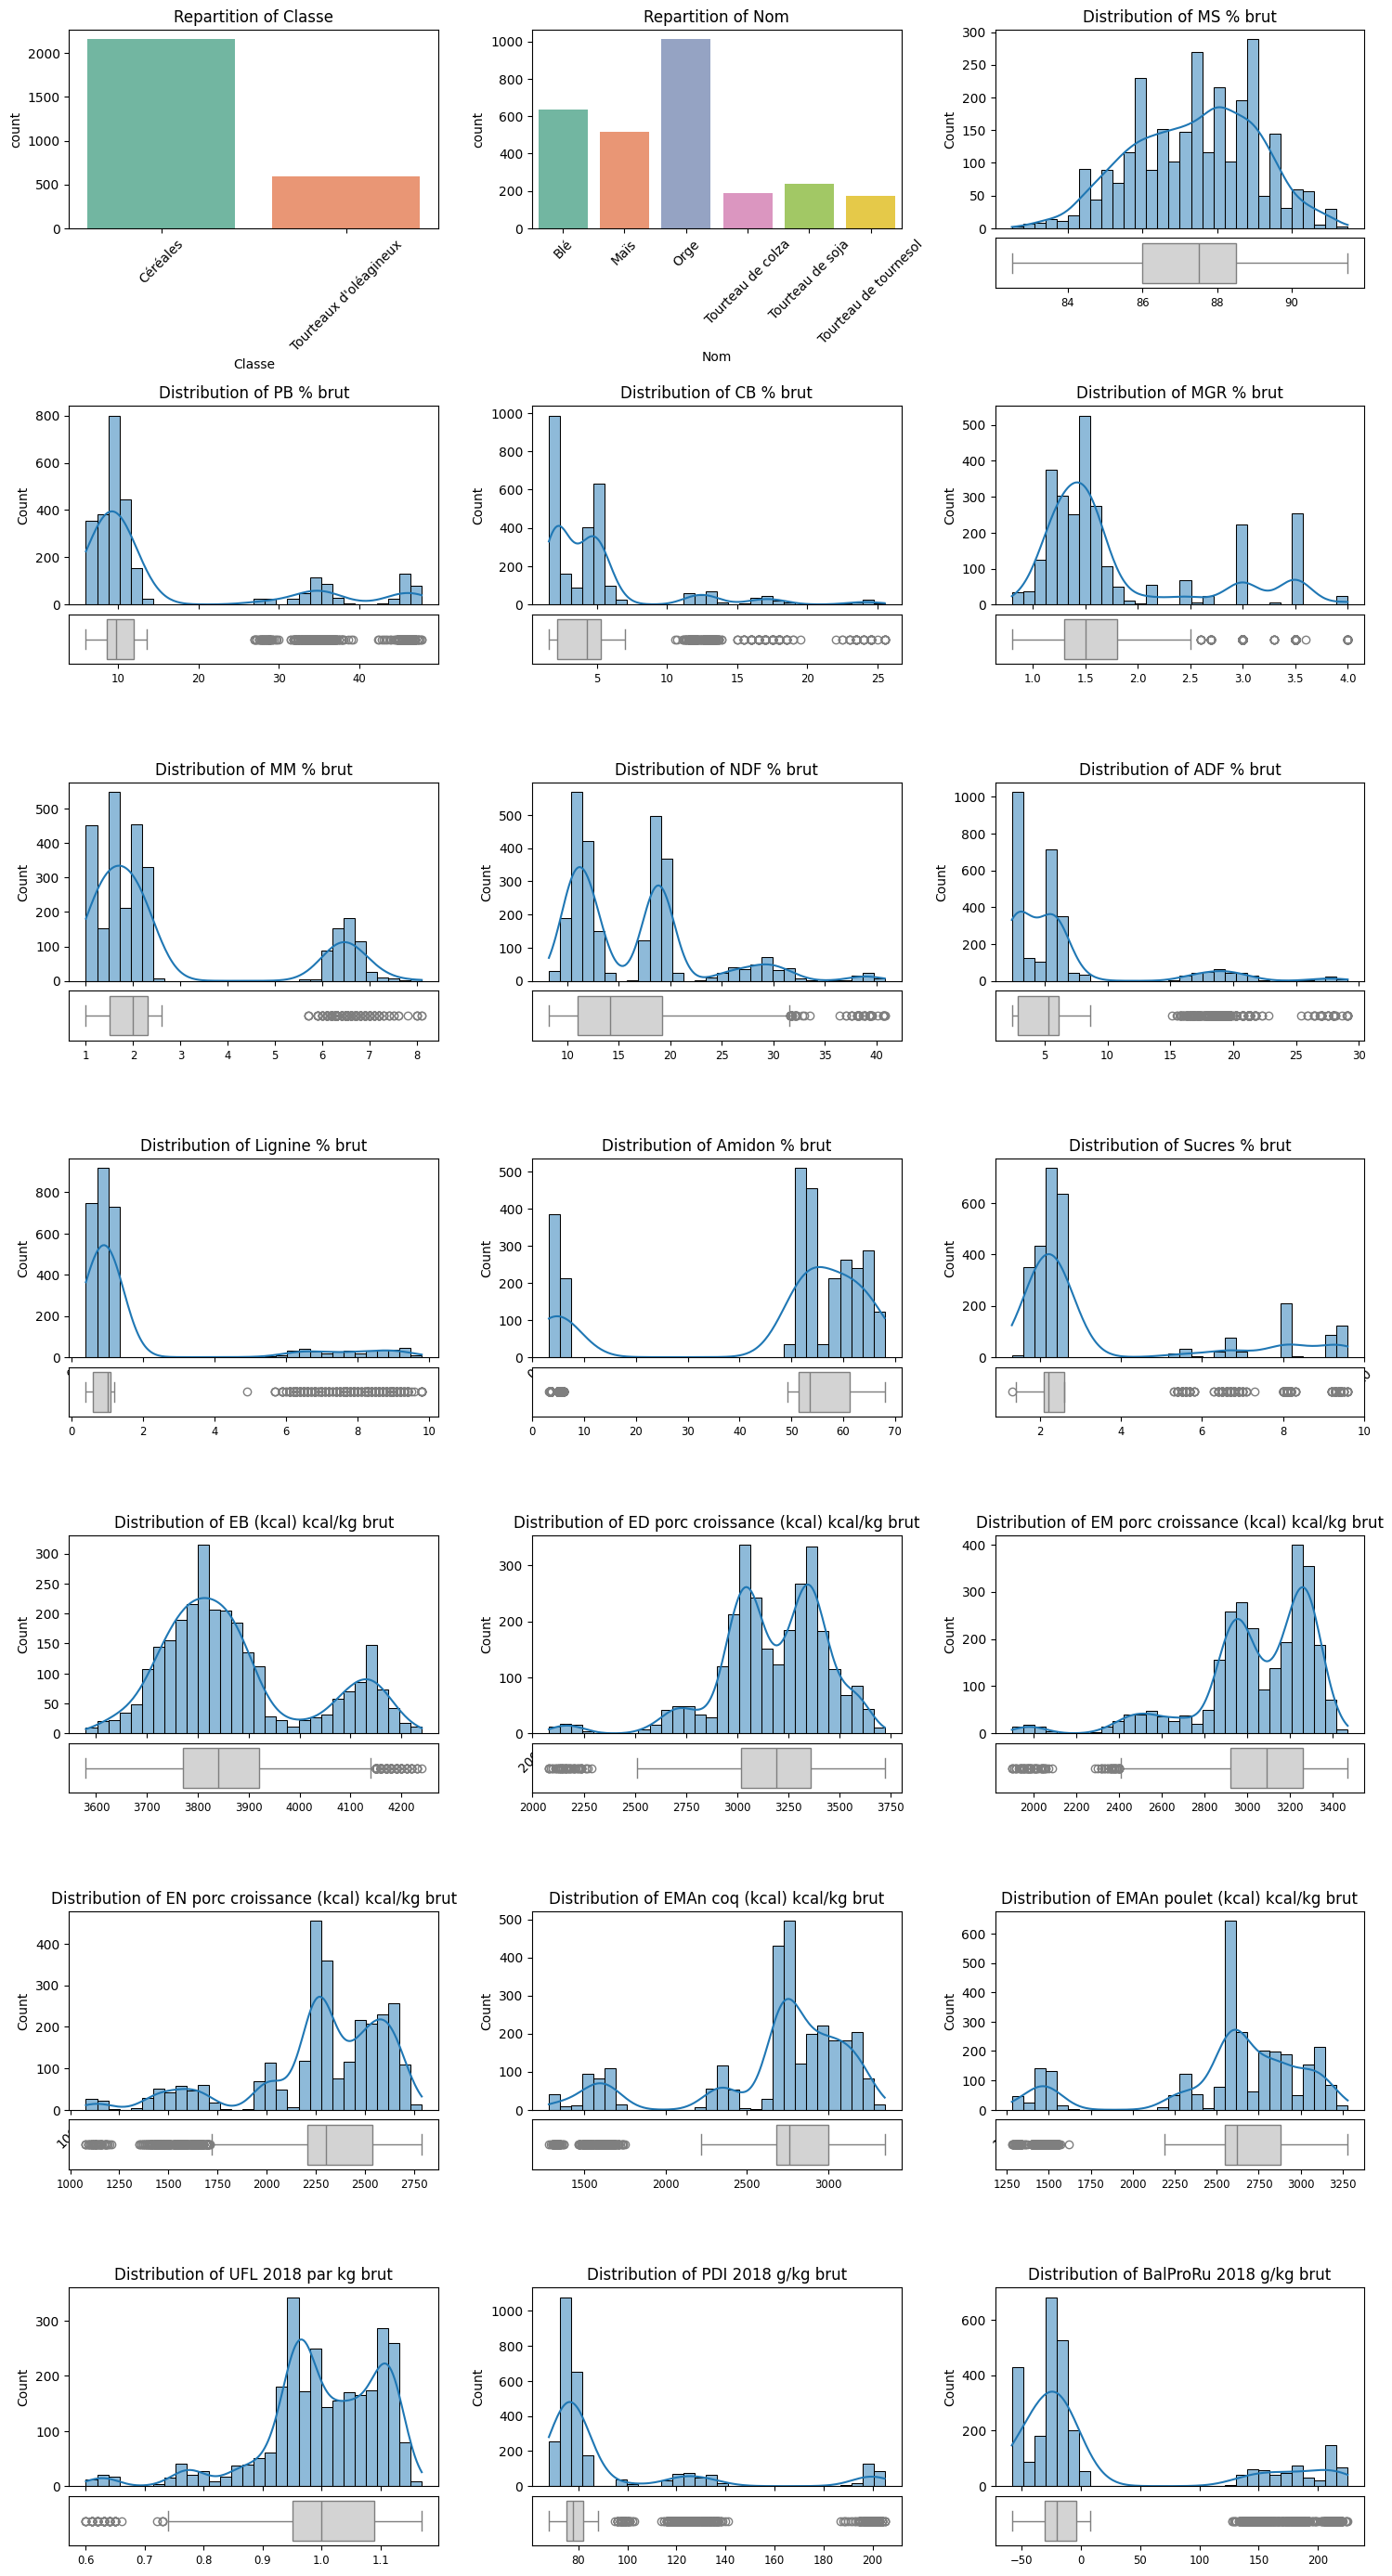

In [4]:



cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
all_cols = cat_cols + num_cols

if len(all_cols) == 0:
    print("Aucune colonne à afficher.")
else:
    ncols = 3
    ncols = min(ncols, len(all_cols))
    nrows = math.ceil(len(all_cols) / ncols)

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
    axs = axs.flatten()

    possible_hues = ['cereal', 'Cereal', 'class', 'Class', 'is_cereal']
    hue_col = next((h for h in possible_hues if h in df.columns), None)

    for i, column in enumerate(all_cols):
        ax = axs[i]
        if column in cat_cols:
            if hue_col is not None and hue_col != column:
                sns.countplot(data=df, x=column, hue=hue_col, palette='Set2', ax=ax)
                ax.legend(title=hue_col, loc='upper right', fontsize='small')
            else:
                sns.countplot(data=df, x=column, palette='Set2', ax=ax)
            ax.set_title(f'Repartition of {column}')
        else:
            # histogramme principal
            sns.histplot(data=df, x=column, kde=True, palette='Set2', bins=30, ax=ax)
            ax.set_title(f'Distribution of {column}')

            # inset: petite boxplot sous l'histogramme
            # ajuster le dernier nombre pour augmenter/diminuer la hauteur
            inset_ax = ax.inset_axes([0, -0.30, 1, 0.25])  # [left, bottom, width, height] en fraction de ax
            if hue_col is not None:
                # boxplot groupée par la colonne hue (affiche distribution par classe)
                sns.boxplot(x=hue_col, y=column, data=df, palette='Set2', ax=inset_ax)
                inset_ax.set_xlabel('')
                inset_ax.set_ylabel('')
            else:
                # boxplot simple (horizontale)
                sns.boxplot(x=column, data=df, orient='h', color='lightgrey', ax=inset_ax)
                inset_ax.set_xlabel('')
                inset_ax.set_yticks([])

            # lisibilité: réduire les labels et la taille de police
            inset_ax.tick_params(axis='x', rotation=0, labelsize='small')
            inset_ax.tick_params(axis='y', labelsize='small')

        ax.tick_params(axis='x', rotation=45)

    for j in range(len(all_cols), len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


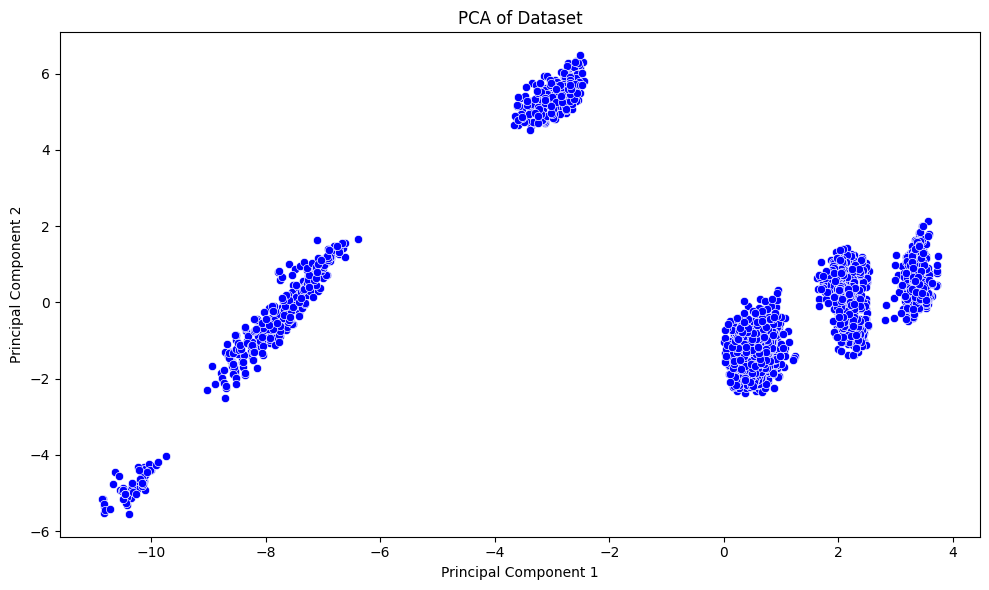

In [5]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
# Sélection des colonnes numériques pour la PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numeric_cols].dropna()  # Supprimer les lignes avec des valeurs manquantes
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
# Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)
# Convertir en DataFrame pour une manipulation plus facile
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Si une colonne de classe céréales existe, l'ajouter pour la coloration
if hue_col is not None:
    pca_df[hue_col] = df.loc[X.index, hue_col].values
# Visualiser les résultats de la PCA
plt.figure(figsize=(10, 6))
if hue_col is not None:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=hue_col, palette='Set2')
    plt.legend(title=hue_col)
else:
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', color='blue')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# coloration des 6 classes principales si possible

plt.tight_layout()
plt.show()

(2756, 19)
Index(['MS % brut', 'PB % brut', 'CB % brut', 'MGR % brut', 'MM % brut',
       'NDF % brut', 'ADF % brut', 'Lignine % brut', 'Amidon % brut',
       'Sucres % brut', 'EB (kcal) kcal/kg brut',
       'ED porc croissance (kcal) kcal/kg brut',
       'EM porc croissance (kcal) kcal/kg brut',
       'EN porc croissance (kcal) kcal/kg brut',
       'EMAn coq (kcal) kcal/kg brut', 'EMAn poulet (kcal) kcal/kg brut',
       'UFL 2018 par kg brut', 'PDI 2018 g/kg brut',
       'BalProRu 2018 g/kg brut'],
      dtype='object') avant drop
Index(['MS % brut', 'PB % brut', 'CB % brut', 'MGR % brut', 'MM % brut',
       'NDF % brut', 'ADF % brut', 'Lignine % brut', 'Amidon % brut',
       'Sucres % brut'],
      dtype='object') apres drop
Mean Squared Error: 61.371681213378906
Mean Absolute Error: 5.6943135261535645
R² Score: 0.9991360306739807


/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/622130265.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set2')


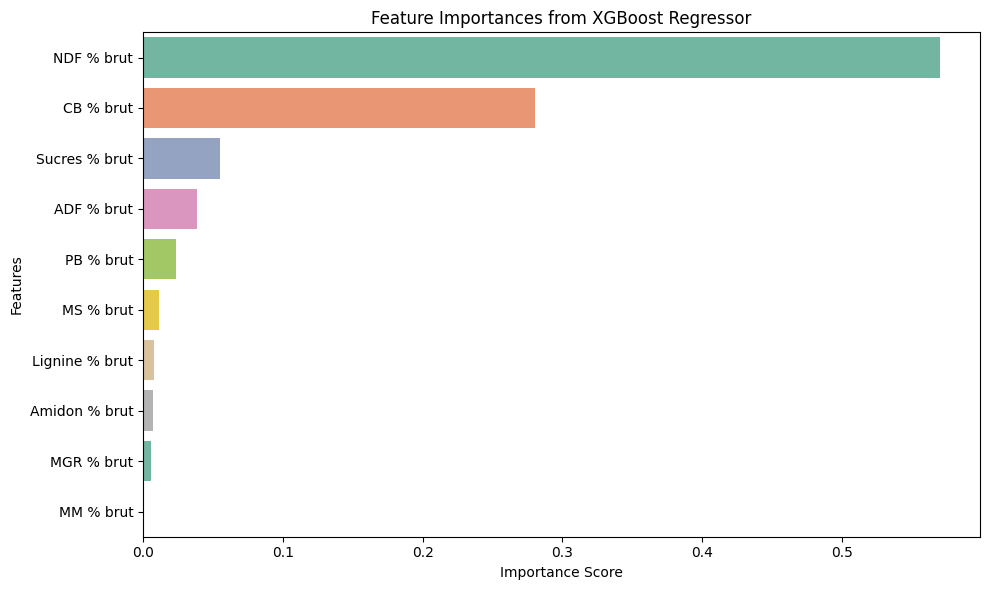

In [41]:
# training a simple model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


X = df[numeric_cols].dropna()
# Dropping row with target variables
print(X.shape)
print(X.columns ,'avant drop')
X_mod = X.drop(columns=['ED porc croissance (kcal) kcal/kg brut',
                        'EB (kcal) kcal/kg brut',
       'EM porc croissance (kcal) kcal/kg brut',
       'EN porc croissance (kcal) kcal/kg brut',
       'EMAn coq (kcal) kcal/kg brut', 'EMAn poulet (kcal) kcal/kg brut',
       'UFL 2018 par kg brut', 'PDI 2018 g/kg brut',
       'BalProRu 2018 g/kg brut'], errors='ignore') 

print(X_mod.columns ,'apres drop')
y = df['EM porc croissance (kcal) kcal/kg brut']  
y1 = df['ED porc croissance (kcal) kcal/kg brut']
y2 = df['EN porc croissance (kcal) kcal/kg brut']
y3 = df['EMAn coq (kcal) kcal/kg brut']
y4 = df['EMAn poulet (kcal) kcal/kg brut']
y5 = df['UFL 2018 par kg brut']
y6 = df['PDI 2018 g/kg brut']
y7 = df['BalProRu 2018 g/kg brut']  

Y = [y, y1, y2, y3, y4, y5, y6, y7] 

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=62)

# Entraîner un modèle XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
mod = model.fit(X_train, y_train)


    
# Faire des prédictions
y_pred = model.predict(X_test)


# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

    

importances = mod.feature_importances_
feature_names = X_mod.columns   
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='Set2')
plt.title('Feature Importances from XGBoost Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

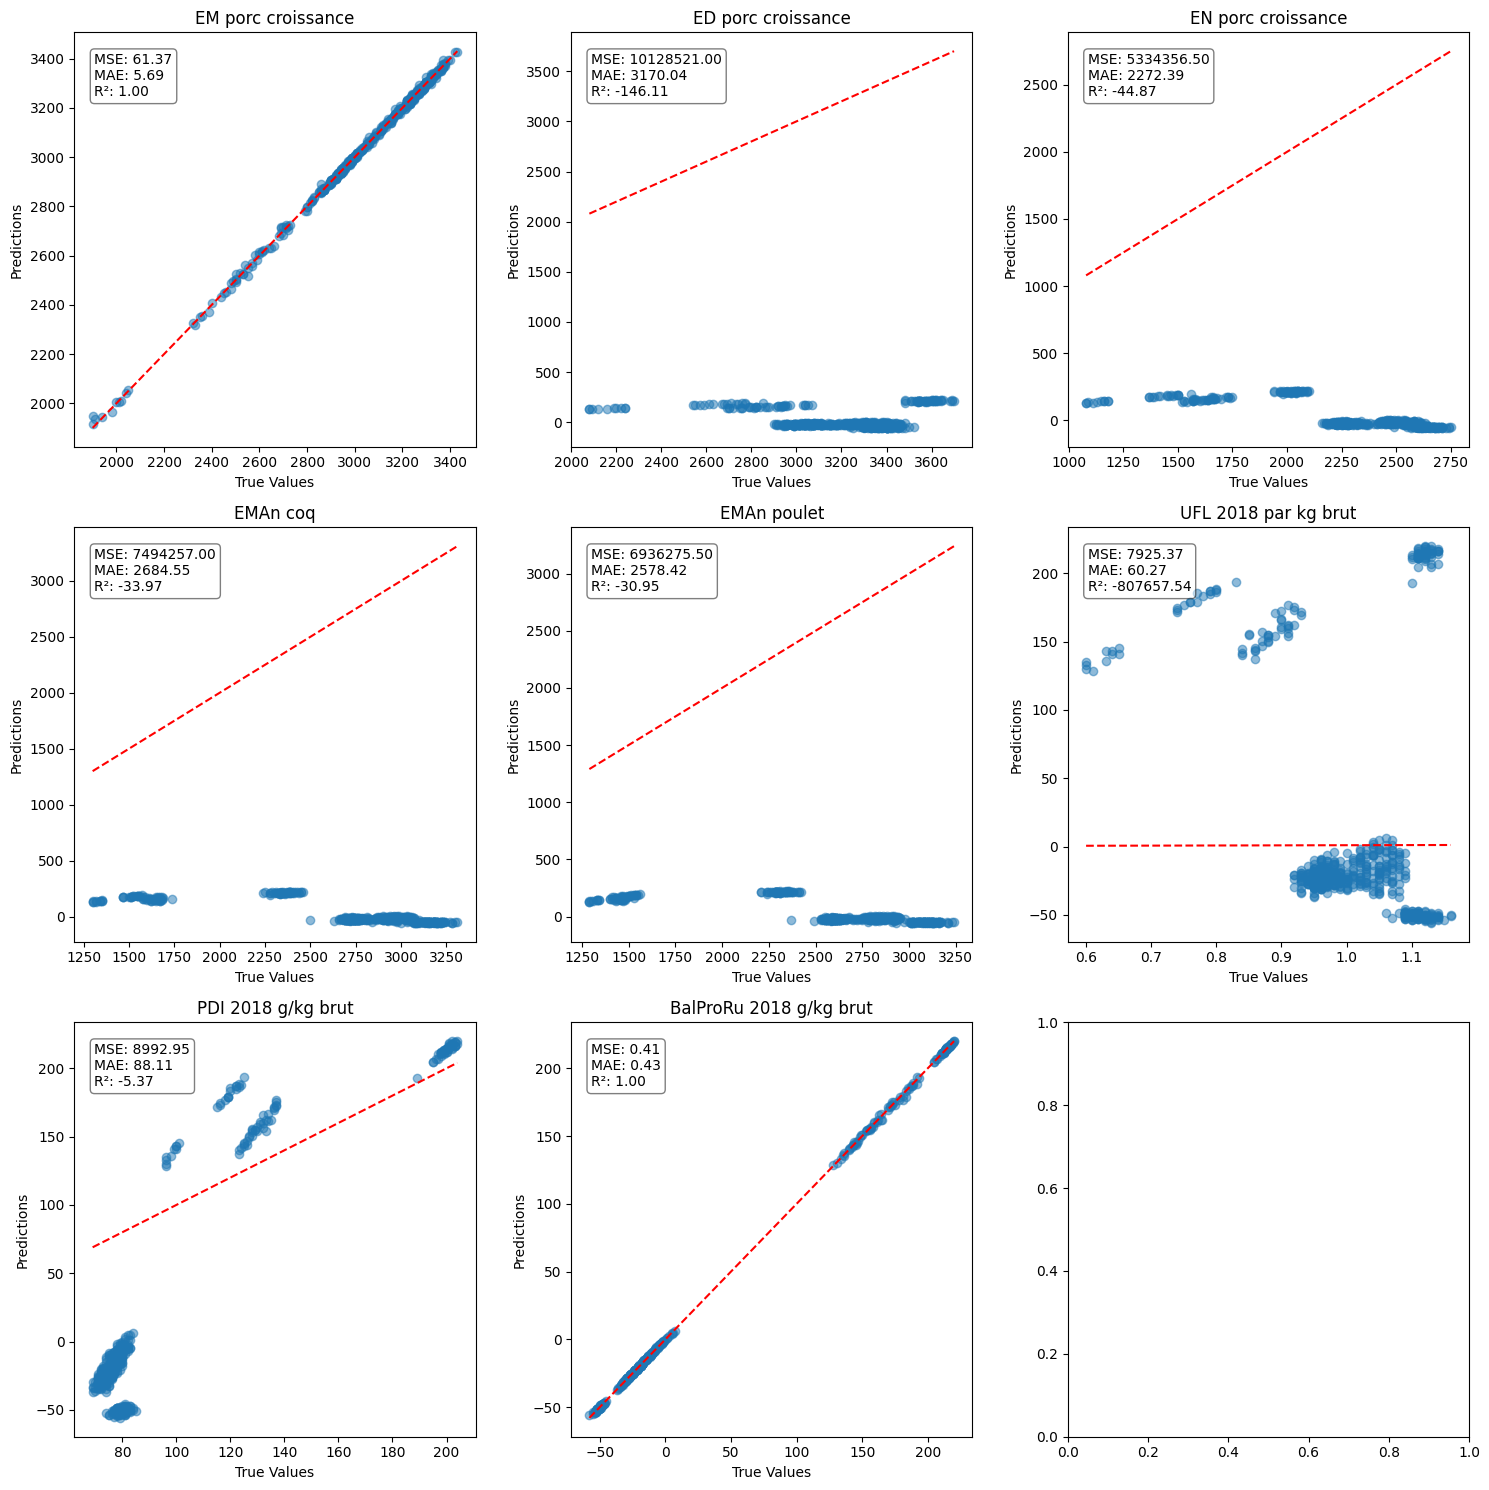

In [42]:
Y = [y, y1, y2, y3, y4, y5, y6, y7] 

X1_train, X1_test, y1_train, y1_test = train_test_split(X_mod, y1, test_size=0.2, random_state=62)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_mod, y2, test_size=0.2, random_state=62)
X3_train, X3_test, y3_train, y3_test = train_test_split(X_mod, y3, test_size=0.2, random_state=62)
X4_train, X4_test, y4_train, y4_test = train_test_split(X_mod, y4, test_size=0.2, random_state=62)
X5_train, X5_test, y5_train, y5_test = train_test_split(X_mod, y5, test_size=0.2, random_state=62)
X6_train, X6_test, y6_train, y6_test = train_test_split(X_mod, y6, test_size=0.2, random_state=62)
X7_train, X7_test, y7_train, y7_test = train_test_split(X_mod, y7, test_size=0.2, random_state=62)
    
mod1 = model.fit(X1_train, y1_train)
mod2 = model.fit(X2_train, y2_train)
mod3 = model.fit(X3_train, y3_train)
mod4 = model.fit(X4_train, y4_train)
mod5 = model.fit(X5_train, y5_train)
mod6 = model.fit(X6_train, y6_train)
mod7 = model.fit(X7_train, y7_train)

y1_pred = model.predict(X1_test)
y2_pred = model.predict(X2_test)
y3_pred = model.predict(X3_test)
y4_pred = model.predict(X4_test)
y5_pred = model.predict(X5_test)
y6_pred = model.predict(X6_test)
y7_pred = model.predict(X7_test)

mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
r22 = r2_score(y2_test, y2_pred)

mse3 = mean_squared_error(y3_test, y3_pred)
mae3 = mean_absolute_error(y3_test, y3_pred)
r23 = r2_score(y3_test, y3_pred)
mse4 = mean_squared_error(y4_test, y4_pred)
mae4 = mean_absolute_error(y4_test, y4_pred)
r24 = r2_score(y4_test, y4_pred)
mse5 = mean_squared_error(y5_test, y5_pred)
mae5 = mean_absolute_error(y5_test, y5_pred)
r25 = r2_score(y5_test, y5_pred)
mse6 = mean_squared_error(y6_test, y6_pred)
mae6 = mean_absolute_error(y6_test, y6_pred)
r26 = r2_score(y6_test, y6_pred)
mse7 = mean_squared_error(y7_test, y7_pred)
mae7 = mean_absolute_error(y7_test, y7_pred)
r27 = r2_score(y7_test, y7_pred)

#graphic of the results
figure, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
titles = [
    'EM porc croissance',
    'ED porc croissance',
    'EN porc croissance',
    'EMAn coq',
    'EMAn poulet',
    'UFL 2018 par kg brut',
    'PDI 2018 g/kg brut',
    'BalProRu 2018 g/kg brut'
]
preds = [y_pred, y1_pred, y2_pred, y3_pred, y4_pred, y5_pred, y6_pred, y7_pred]
tests = [y_test, y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test]
metrics = [(mse, mae, r2),
           (mse1, mae1, r21),
           (mse2, mae2, r22),
           (mse3, mae3, r23),
           (mse4, mae4, r24),
           (mse5, mae5, r25),
           (mse6, mae6, r26),
              (mse7, mae7, r27)]    
for i in range(8):
    axes[i].scatter(tests[i], preds[i], alpha=0.5)
    axes[i].plot([tests[i].min(), tests[i].max()], [tests[i].min(), tests[i].max()], 'r--')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('True Values')
    axes[i].set_ylabel('Predictions')
    mse_val, mae_val, r2_val = metrics[i]
    axes[i].text(0.05, 0.95, f'MSE: {mse_val:.2f}\nMAE: {mae_val:.2f}\nR²: {r2_val:.2f}',
                 transform=axes[i].transAxes,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.tight_layout()
plt.show()
    


In [36]:
# on veut prédire la valeur cible pour un exemple

print("Colonnes attendues:")
for i, col in enumerate(X_mod.columns):
    print(f"{i}: {col}")
# on veut prédire la valeur cible pour un exemple
X_essai = pd.DataFrame(
    [[86.89, 10.96, 2.39, 1.54, 1.37, 12.78, 3.28, 1.05, 60, 2.62]],
    columns=X_mod.columns
)

y_pred = model.predict(X_essai)
print(f"Predicted value for the example: {y_pred[0]}")



Colonnes attendues:
0: MS % brut
1: PB % brut
2: CB % brut
3: MGR % brut
4: MM % brut
5: NDF % brut
6: ADF % brut
7: Lignine % brut
8: Amidon % brut
9: Sucres % brut
10: EB (kcal) kcal/kg brut


ValueError: 11 columns passed, passed data had 10 columns

In [ ]:
#!brew install graphviz

==> Auto-updating Homebrew...
Adjust how often this is run with `$HOMEBREW_AUTO_UPDATE_SECS` or disable with
`$HOMEBREW_NO_AUTO_UPDATE=1`. Hide these hints with `$HOMEBREW_NO_ENV_HINTS=1` (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/core/portable-ruby/blobs/sha256:c6946ba2c387b47934e77c352c2056489421003ec7ddb2abf246cef2168ec140
######################################################################### 100.0%
==> Pouring portable-ruby-3.4.7.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
ansible@12: Automate deployment, configuration, and upgrading
fnox: Fort Knox for your secrets - flexible secret management tool
forgejo-cli: CLI tool for interacting with Forgejo
gitnr: Create `.gitignore` using templates from TopTal, GitHub or your own collection
gotun: Lightweight HTTP proxy over SSH
gruyere: TUI program for viewing and killing processes listening on ports
gwctl: CLI for managing and inspecting 

/opt/miniconda3/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


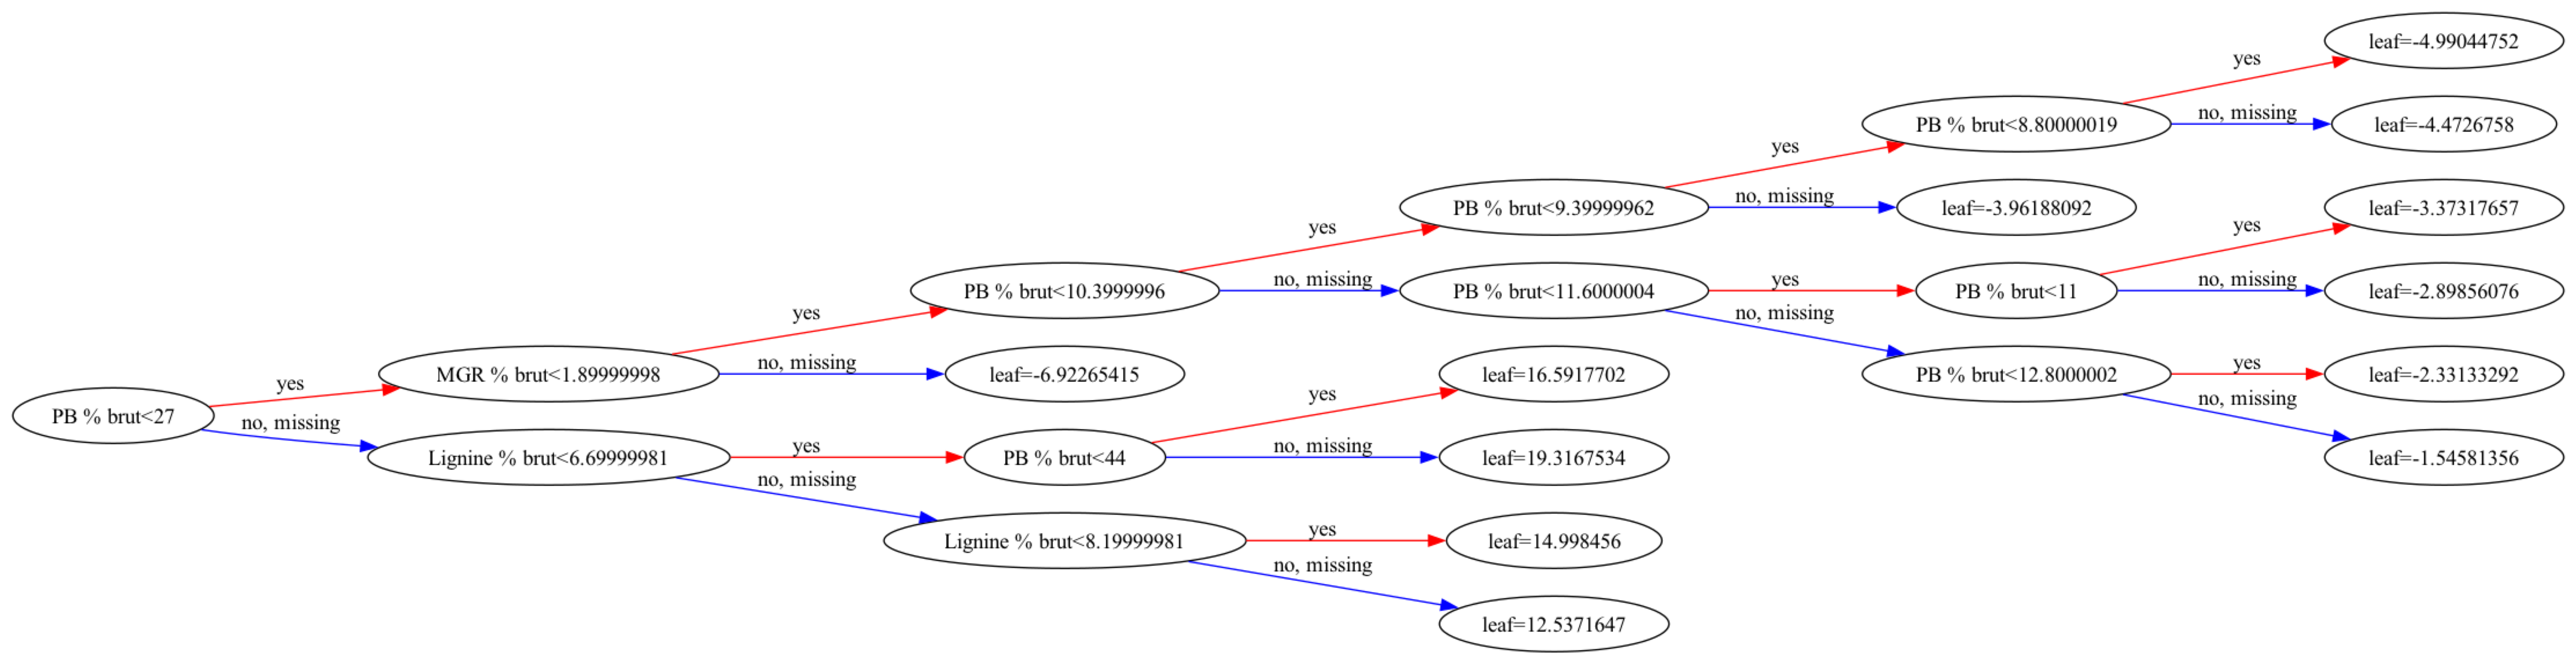

In [22]:
# Visualisation de l'arbre du modèle avec meilleure résolution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50, 10), dpi=150)
xgb.plot_tree(model, num_trees=0, ax=ax, rankdir='LR')
plt.tight_layout()
plt.show()

=== XGBoost Model Tree Structure ===
Number of trees: 100
Max depth: 5
Learning rate: 0.1


/var/folders/0l/r3n8q2ss50j_0szvj1_l70_r0000gn/T/ipykernel_30275/2154908682.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='Set2')


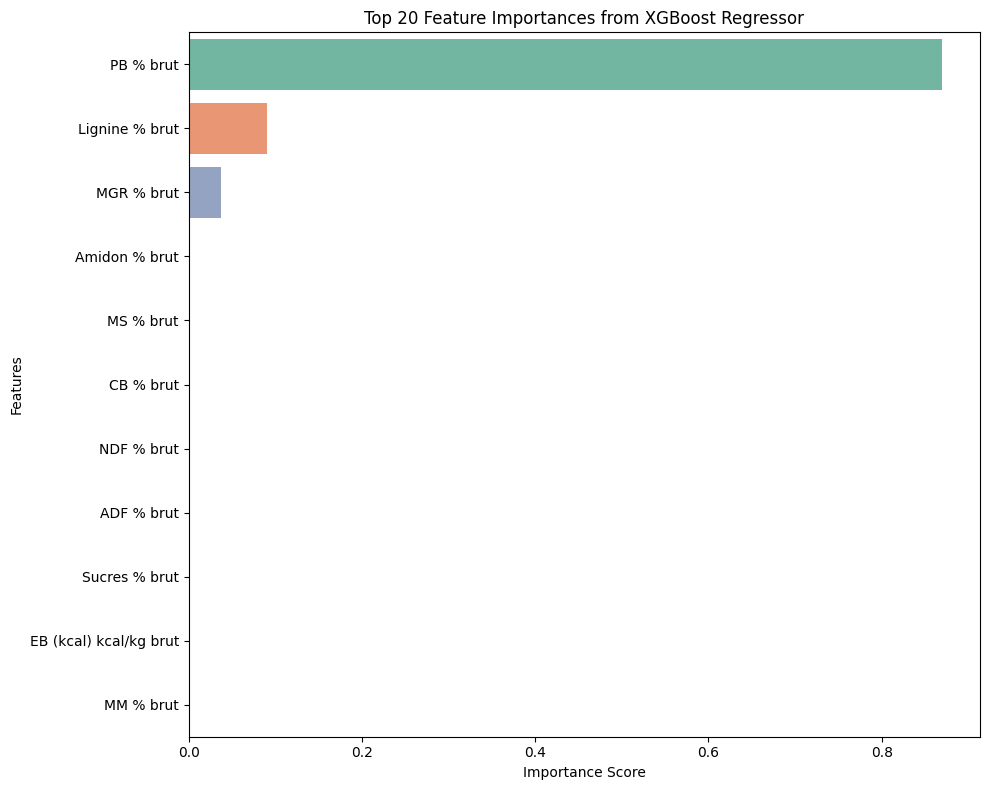

In [24]:
# Visualisation alternative sans Graphviz
import matplotlib.pyplot as plt

# Afficher les features importances (déjà fait avant)
# Ou utiliser une approche textuelle simple :

print("=== XGBoost Model Tree Structure ===")
print(f"Number of trees: {model.n_estimators}")
print(f"Max depth: {model.max_depth}")
print(f"Learning rate: {model.learning_rate}")

# Afficher les 20 features les plus importantes
importances = model.feature_importances_
feature_names = X_mod.columns   
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='Set2')
plt.title('Top 20 Feature Importances from XGBoost Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()